In [1]:
import sys,os
sys.path.append(os.getcwd())
sys.path.append(os.getcwd()[:-8]+'src')
from Algorithms import *
from metrics import *
import seaborn as sns
import matplotlib
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 
plt.style.use('default')#../misc/report.mplstyle')
cust_cmap =sns.color_palette("flare_r", as_cmap=True)
cust_cmap2 = matplotlib.cm.get_cmap('Set2')#.colors
plt.rcParams["font.family"] = "Arial"
cm = 1/2.54

In [2]:
#Load dataset
resp = np.load('/Users/constb/Data/PachitariuData/Noisy/gratings_noisy_GT2_2019_04_08_1.npy',allow_pickle=True).item()


/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_52594/3309959853.py:20: RuntimeWarning: Mean of empty slice
  avg_responses_lowres[c] = np.nanmean(responses[:,bin_indx],1)


(array([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 2.],
        ...,
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 3.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([  5.  ,   9.74,  14.48,  19.22,  23.96,  28.7 ,  33.44,  38.18,
         42.92,  47.66,  52.4 ,  57.14,  61.88,  66.62,  71.36,  76.1 ,
         80.84,  85.58,  90.32,  95.06,  99.8 , 104.54, 109.28, 114.02,
        118.76, 123.5 , 128.24, 132.98, 137.72, 142.46, 147.2 , 151.94,
        156.68, 161.42, 166.16, 170.9 , 175.64, 180.38, 185.12, 189.86,
        194.6 , 199.34, 204.08, 208.82, 213.56, 218.3 , 223.04, 227.78,
        232.52, 237.26, 242.  , 246.74, 251.48, 256.22, 260.96, 265.7 ,
        270.44, 275.18, 279.92, 284.66, 289.4 , 294.14, 298.88, 303.62,
        308.36, 313.1 , 317.84, 322.58, 327.32, 332.06, 336.8 , 341.54,
        346.28, 351.02, 355.76, 360.5 , 365.24, 369.98, 374.72, 379.46,
        384.2 , 388.94, 393.68,

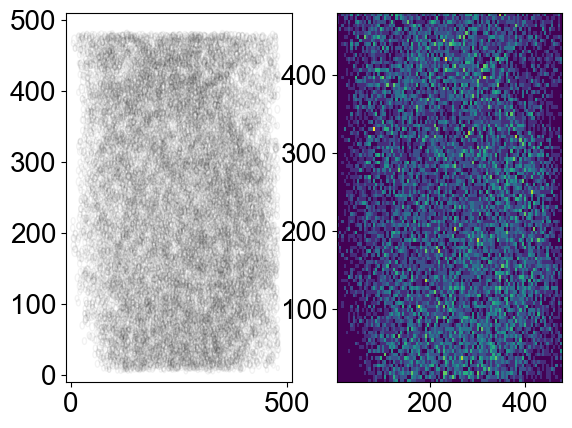

In [18]:
responses = resp['sresp']
indices=  resp['istim']
if len(responses.T)>len(indices):
    responses = responses[:,:len(indices)]
uniq_ids = np.unique(indices)
stim_res = 126
stim_lowres = 32
stim_bins = np.linspace(0,2*np.pi+2*np.pi/(stim_res+4),stim_res+2)[:-1]#np.linspace(uniq_ids[0],uniq_ids[-1],61)# We added 2*np.pi/60 to get degrees of distance 6 apart.
stim_bins_lowres = np.linspace(0,2*np.pi+2*np.pi/12,stim_lowres)[:-1]#np.linspace(uniq_ids[0],uniq_ids[-1],61)
stim_bins_degrees = (180*stim_bins/np.pi)

#responses = responses/np.max(responses)
avg_responses = np.zeros([len(stim_bins)-1,len(responses)])
avg_responses_lowres = np.zeros([len(stim_bins_lowres)-1,len(responses)])
for c in range(len(stim_bins)-1):
    bin_indx = np.where(np.logical_and(stim_bins[c]<indices,indices<stim_bins[c+1]))[0]
    avg_responses[c] = np.nanmean(responses[:,bin_indx],1)
for c in range(len(stim_bins_lowres)-1):
    bin_indx = np.where(np.logical_and(stim_bins_lowres[c]<indices,indices<stim_bins_lowres[c+1]))[0]
    avg_responses_lowres[c] = np.nanmean(responses[:,bin_indx],1)

#rand_idx = np.random.choice(np.arange(0,len(avg_responses)),50,replace=False)
#print(np.shape(avg_responses))
#avg_responses = avg_responses[rand_idx,:]
#avg_responses_lowres = avg_responses_lowres[rand_idx,:]
#print(np.shape(avg_responses))

response_locations = extract_cell_RFs(resp)

fig, (ax1,ax2) = plt.subplots(1,2)
for i in range(len(response_locations[0])):
    c = plt.Circle(response_locations[0][i],response_locations[1][i],fill=False,alpha=0.05)
    ax1.add_patch(c)
ax1.set_xlim(-10,510)
ax1.set_ylim(-10,510)
ax2.hist2d(response_locations[0][:,0],response_locations[0][:,1],100)

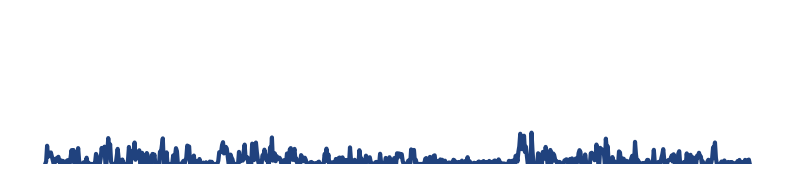

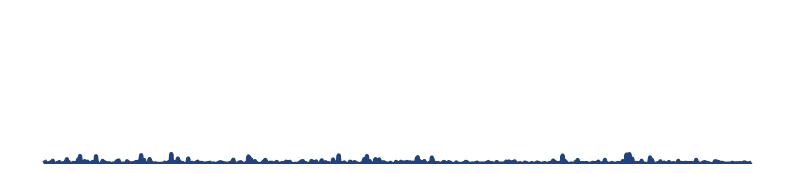

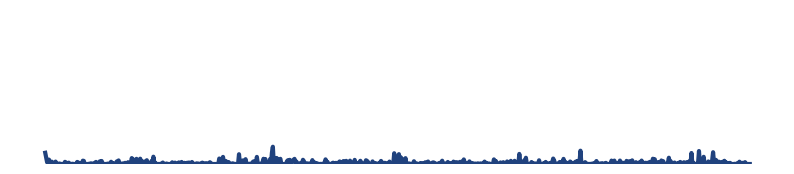

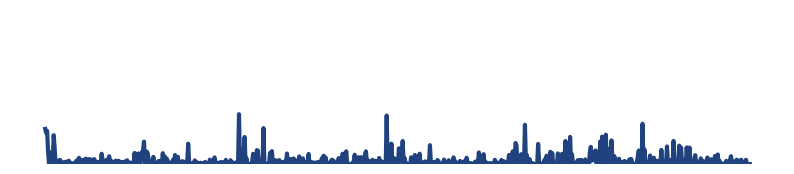

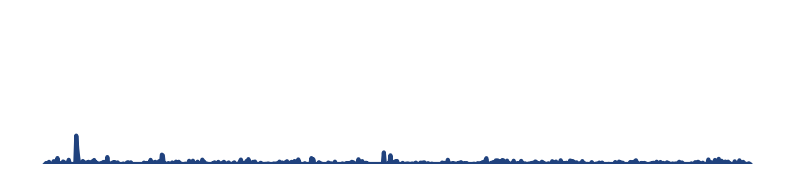

In [4]:
rand_cls = np.random.randint(0,len(responses),5)
max_rcell = np.max(responses[rand_cls])
for c,rcell in enumerate(rand_cls):
    plt.figure(figsize=(10,2))
    plt.plot(responses[rcell,:750],color='#20427eff',linewidth=3)
    plt.ylim(0,max_rcell+50)
    plt.axis('off')
    #plt.savefig('/Users/constb/Figures/NeuralHomology/cell_trace_'+str(c)+'.png',dpi=300,transparent=True)


In [5]:
#optionally select cells in a specific subregion of the image
cell_filter=False
if cell_filter:
    center_limits_high = [275,275]
    center_limits_low = [225,225]
    indx = np.where(np.logical_and(center_limits_low[1]<response_locations[0][:,1],
                                   (np.logical_and(center_limits_low[0]<response_locations[0][:,0],
                                                   np.logical_and(response_locations[0][:,0]<center_limits_high[0],response_locations[0][:,1]<center_limits_high[1])))))[0]
    avg_responses = avg_responses[:,indx]
    avg_responses_lowres = avg_responses_lowres[:,indx]

1 significant 1-cocycles


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 2., 0., 1., 1., 0., 1.]),
 array([0.41633817, 0.41694376, 0.41754935, 0.41815494, 0.41876053,
        0.41936612, 0.41997171, 0.4205773 , 0.42118289, 0.42178848,
        0.42239407, 0.42299965, 0.42360524, 0.42421083, 0.42481642,
        0.42542201, 0.4260276 , 0.42663319, 0.42723878, 0.42784437,
        0.42844996, 0.42905555, 0.42966113, 0.43026672, 0.43087231,
        0.4314779 ]),
 <BarContainer object of 25 artists>)

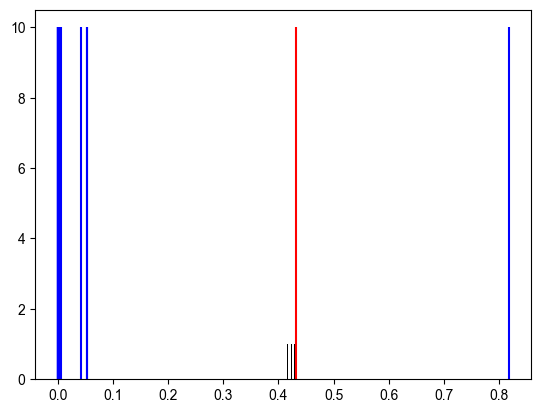

In [6]:
dim_red = 0
metric_used = geodesic_knn(k=4,adaptive=True).fit#pairwise_distances#geodesic#geodesic_knn(k=5,adaptive=True).fit#
Homologizer = Persistent_Homology()
pvalue_hom = Homologizer.perm_test(avg_responses,metric_used,n_perms=10,pval=100)
hom_data = Homologizer(avg_responses,metric_used,False,dim_red,[1,None])
cycle_lengths = hom_data[1][1][:,1]-hom_data[1][1][:,0]

plt.figure()
plt.vlines(pvalue_hom[1],0,10,'b')
plt.vlines(pvalue_hom[0],0,10,'r')
plt.hist(pvalue_hom[2],25,color='k')


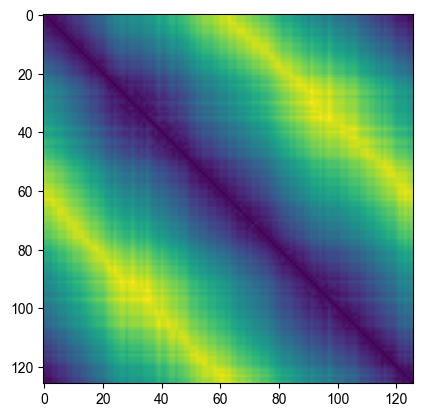

In [7]:
plt.imshow(hom_data[0])

Max cycle index is: 4


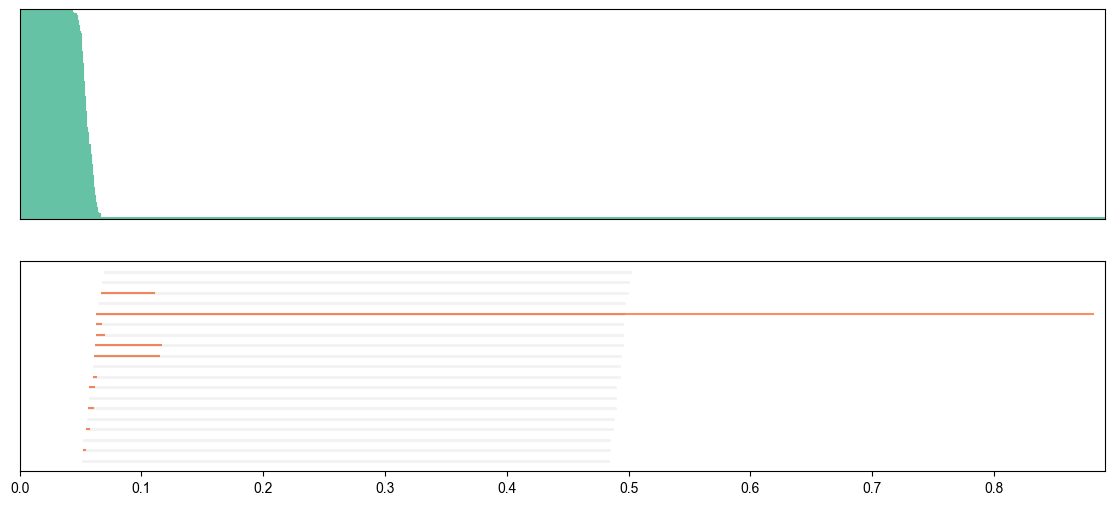

In [8]:
max_cycle = np.argsort(cycle_lengths).astype(int)[-1]
print('Max cycle index is: ' + str(max_cycle))
dmult=0.5
hom_crossection = hom_data[1][1][max_cycle][0]+ dmult*(hom_data[1][1][max_cycle][1]-hom_data[1][1][max_cycle][0])

Homologizer.barcode_plot(hom_data[1],2,pval=pvalue_hom[0])
#plt.vlines(hom_crossection,-1,2,'k',linewidth=5)
#plt.savefig('barcode_geodesic.png',dpi=1000)

/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


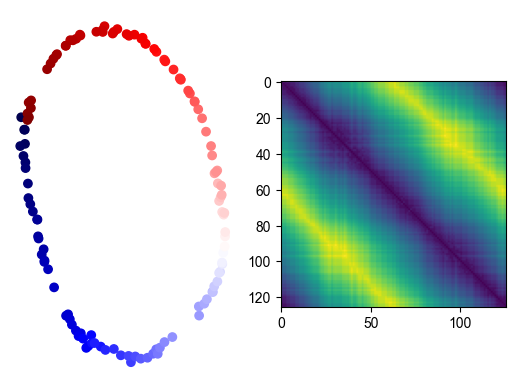

In [9]:
reducer = umap.UMAP(n_neighbors=50,min_dist=0,n_components=2,metric='precomputed')#PCA(n_components=2)#Random_Projector(n_components=2)#PCA(n_components=2)#
ori_mfld = reducer.fit_transform(hom_data[0])

fig = plt.figure()
plt.subplot(121)
plt.scatter(ori_mfld[:,0],ori_mfld[:,1],cmap='seismic',c=stim_bins[:-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(hom_data[0])

#plt.savefig('PCA_manifold_euclid.png',dpi=1000)

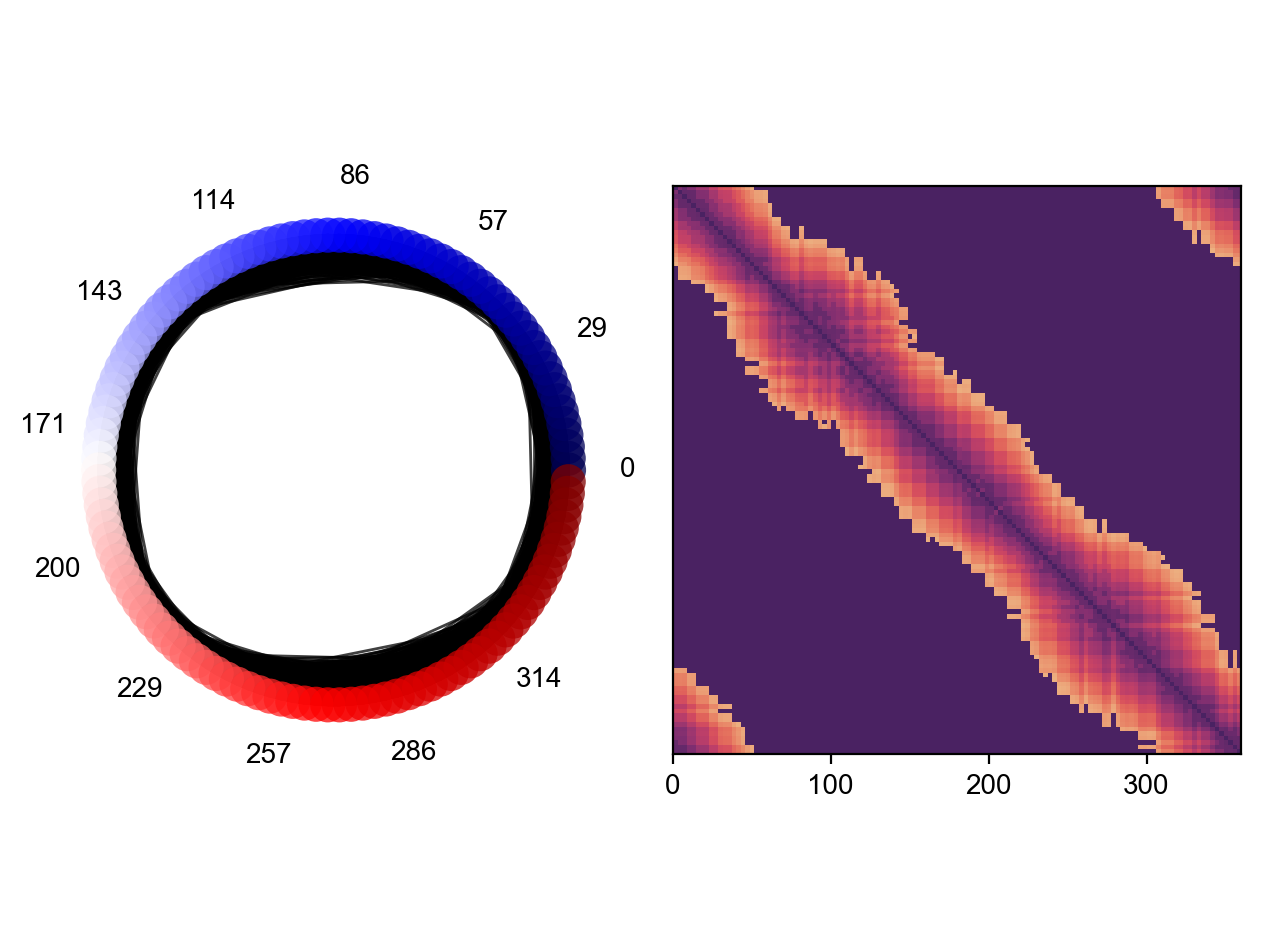

In [10]:
edge_dist = np.copy(hom_data[0])
edge_dist[edge_dist>hom_crossection] = 0

BA = Barcode_Analyzer()

plt.figure(dpi=200)
plt.subplot(121)
BA.plotCocycle2D(hom_data[0],ori_mfld[:,:2],hom_crossection,labels=stim_bins_degrees,node_cmap='seismic')
plt.subplot(122)
plt.imshow(edge_dist, extent=[0,360,360,0],cmap=cust_cmap)
plt.yticks([])
plt.tight_layout()
#plt.savefig('Nmanifold_euclid.png')

### Extract different tunning curves to see if they generate different manifolds

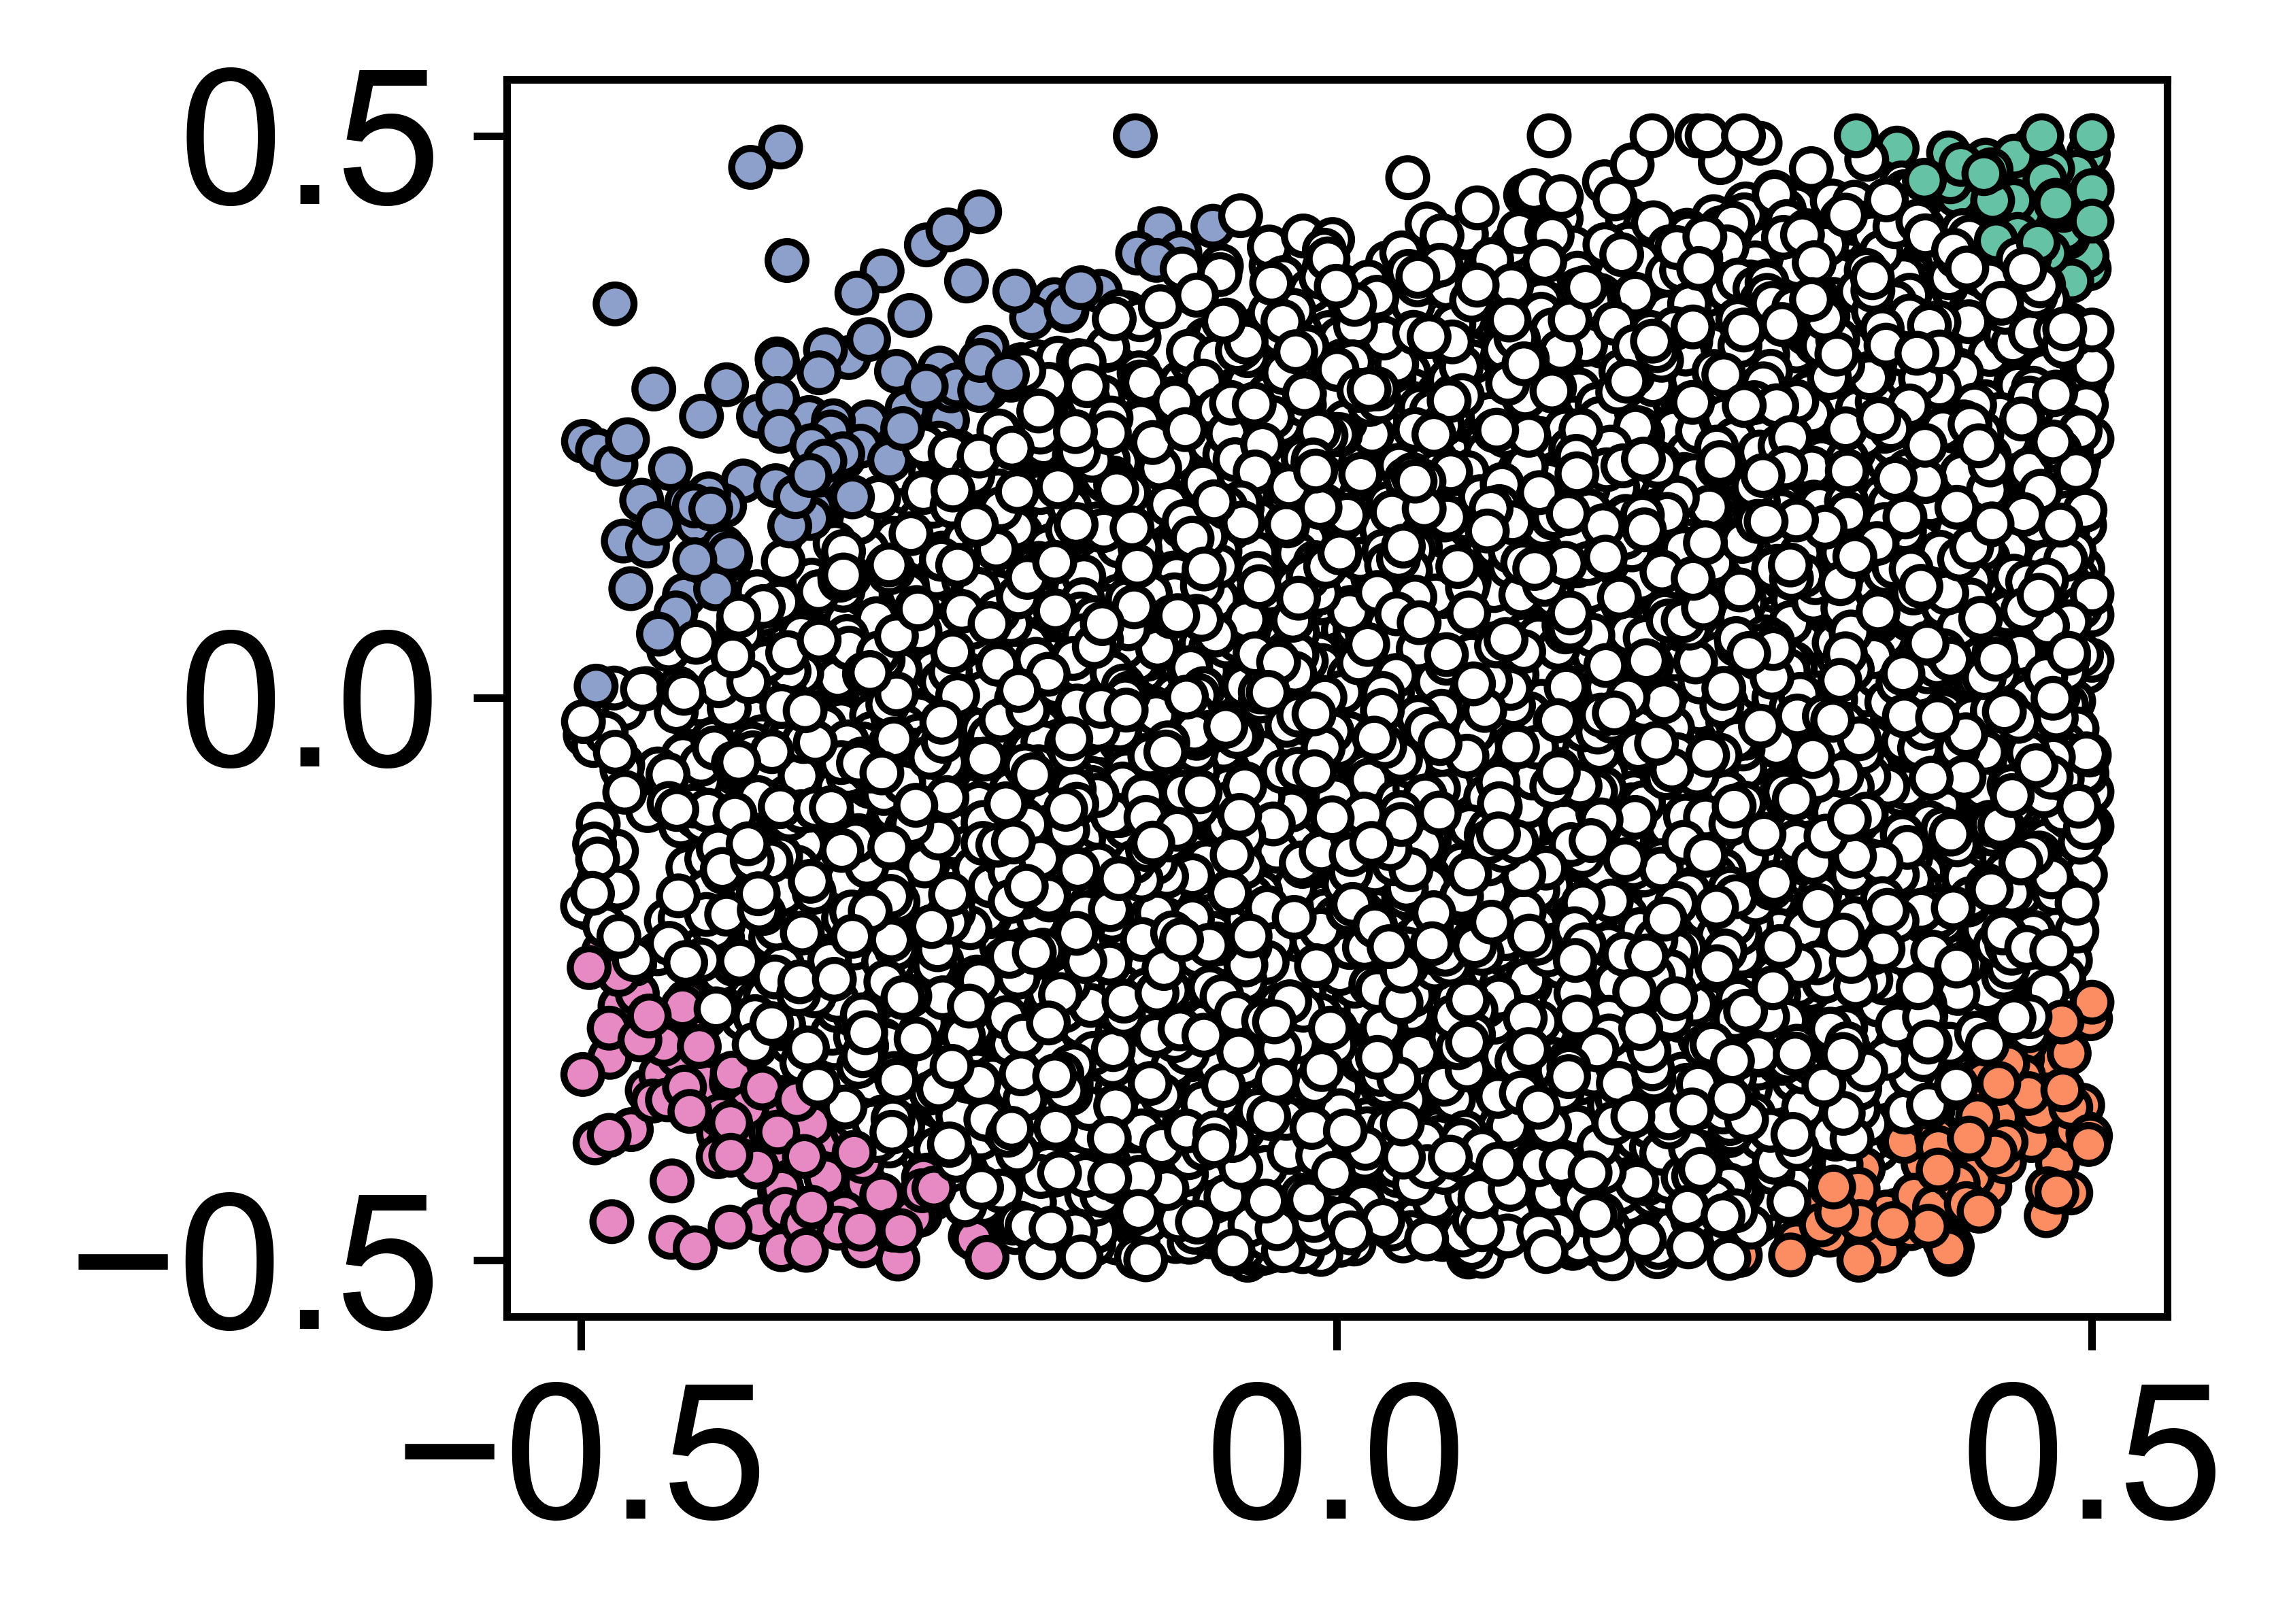

In [14]:
osi = orientation_selectivity_index(avg_responses,stim_bins[:-1])#angle_selectivity_index(avg_responses_lowres,4)#
dsi = direction_selectivity_index(avg_responses,stim_bins[:-1])#angle_selectivity_index(avg_responses_lowres,2)#


osi_centered = osi-0.5
dsi_centered = dsi-0.5
si_2d = np.vstack([osi_centered,dsi_centered]).T
xy_boundaries = (0,0)#(0.3,0.3)#np.mean(si_2d,1)#

n_clusters = 4
#si_clusters = si_clustering(avg_responses_lowres,[2,4],n_clusters)

#angle_invar_clusters = angle_invar_clustering(avg_responses_lowres.T,n_clusters)#list(np.arange(2,16)))
#print(np.shape(angle_invar_clusters[0]))
#clust_labels = si_clusters#angle_invar_clusters[1]

N_sub = 101
neuron_clusters = []
unimodal_neurons = np.where(np.logical_and(osi_centered>xy_boundaries[0],dsi_centered>xy_boundaries[1]))[0]#clust_labels==0)[0]#
bimodal_neurons = np.where(np.logical_and(osi_centered>xy_boundaries[0],dsi_centered<-xy_boundaries[1]))[0]#clust_labels==1)[0]#
nonlinear_neurons = np.where(np.logical_and(osi_centered<-xy_boundaries[0],dsi_centered>xy_boundaries[1]))[0]#clust_labels==2)[0]#
noise_neurons = np.where(np.logical_and(osi_centered<-xy_boundaries[0],dsi_centered<-xy_boundaries[1]))[0]#clust_labels==3)[0]#
unimodal_neurons = unimodal_neurons[np.argsort(np.linalg.norm(si_2d[unimodal_neurons],ord=1,axis=1))[-N_sub:]]
bimodal_neurons = bimodal_neurons[np.argsort(np.linalg.norm(si_2d[bimodal_neurons],ord=1,axis=1))[-N_sub:]]
nonlinear_neurons = nonlinear_neurons[np.argsort(np.linalg.norm(si_2d[nonlinear_neurons],ord=1,axis=1))[-N_sub:]]
noise_neurons = noise_neurons[np.argsort(np.linalg.norm(si_2d[noise_neurons],ord=1,axis=1))[-N_sub:]]

neuron_clusters = [unimodal_neurons,bimodal_neurons,nonlinear_neurons,noise_neurons]
color_labels = np.ones([len(osi_centered),3])
#clust_means = np.zeros(n_clusters)
#for i in range(n_clusters):
#    neuron_clusters.append(np.where(clust_labels==i)[0])
#    clust_means[i] = (np.mean(angle_invar_clusters[0][neuron_clusters[-1]],0)-np.mean(angle_invar_clusters[0][neuron_clusters[-1]]))[int(len(stim_bins_lowres)/2)]
#cluster_reorder = np.argsort(clust_means)
#neuron_clusters = [neuron_clusters[i] for i in cluster_reorder]
for i in range(n_clusters):
    color_labels[neuron_clusters[i]] = cust_cmap2.colors[i]
plt.rc('axes', axisbelow=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

plt.figure(dpi=1000,figsize=(8*cm,6*cm))
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
#plt.axhline(y=xy_boundaries[1], color='k')
#plt.axvline(x=xy_boundaries[0], color='k')
#plt.axvline(x=-xy_boundaries[0], color='k')
#plt.axhline(y=-xy_boundaries[1], color='k')
plt.scatter(osi_centered,dsi_centered,s=16,c=color_labels,edgecolor='black',linewidths=0.75)
#plt.xlabel('OSI')
#plt.ylabel('DSI')

#plt.savefig('/Users/constb/Figures/NeuralHomology/cell_classification_'+str(N_sub)+'.png',transparent=True,dpi=1000, bbox_inches='tight')

In [ ]:
#hom_data = Homologizer(avg_responses.T,pairwise_distances,False,dim_red,[1,1000])
#Homologizer.barcode_plot(hom_data[1])

#cocycles = hom_data[2][1]
#cocycle_pers = hom_data[1][1][:,1]-hom_data[1][1][:,0]
#cocycle_len = [len(cocycles[i]) for i in range(len(cocycles))]

#max_cycle = cocycles[np.argsort(cocycle_pers)[-1]]#cocycles[np.argmax(cocycle_len)]
#involved_neurons = np.unique(np.vstack(max_cycle))
#involved_neurons = np.delete(involved_neurons,np.where(involved_neurons==1),0)
#print(involved_neurons)

#hom_data = Homologizer(avg_responses[:,involved_neurons],metric_used,False,dim_red,[1,None])
#Homologizer.barcode_plot(hom_data[1])



In [ ]:
from sklearn.cluster import DBSCAN

reducer2 = umap.UMAP(n_neighbors=3,min_dist=0,n_components=2)
cell_mfld = reducer2.fit_transform(avg_responses.T)

clustering = DBSCAN(eps=.75,min_samples=400).fit(cell_mfld)
lbls = clustering.labels_
print(np.unique(lbls))
plt.hist(lbls)
plt.figure(dpi=300)
plt.plot(cell_mfld[:,0],cell_mfld[:,1],'ko',markersize=3)
for i in range(len(np.unique(lbls))):
    plt.plot(cell_mfld[lbls==i,0],cell_mfld[lbls==i,1],'.',markersize=2)
plt.plot(cell_mfld[involved_neurons,0],cell_mfld[involved_neurons,1],'y.',markersize=1)



In [15]:
plt.figure()
[plt.plot(stim_bins_lowres[:-1],np.mean(angle_invar_clusters[0][cn],0)-np.mean(angle_invar_clusters[0][cn]),'-o',color=cust_cmap2.colors[i]) for i,cn in enumerate(neuron_clusters)]
plt.grid('on')

NameError: name 'angle_invar_clusters' is not defined

<Figure size 640x480 with 0 Axes>

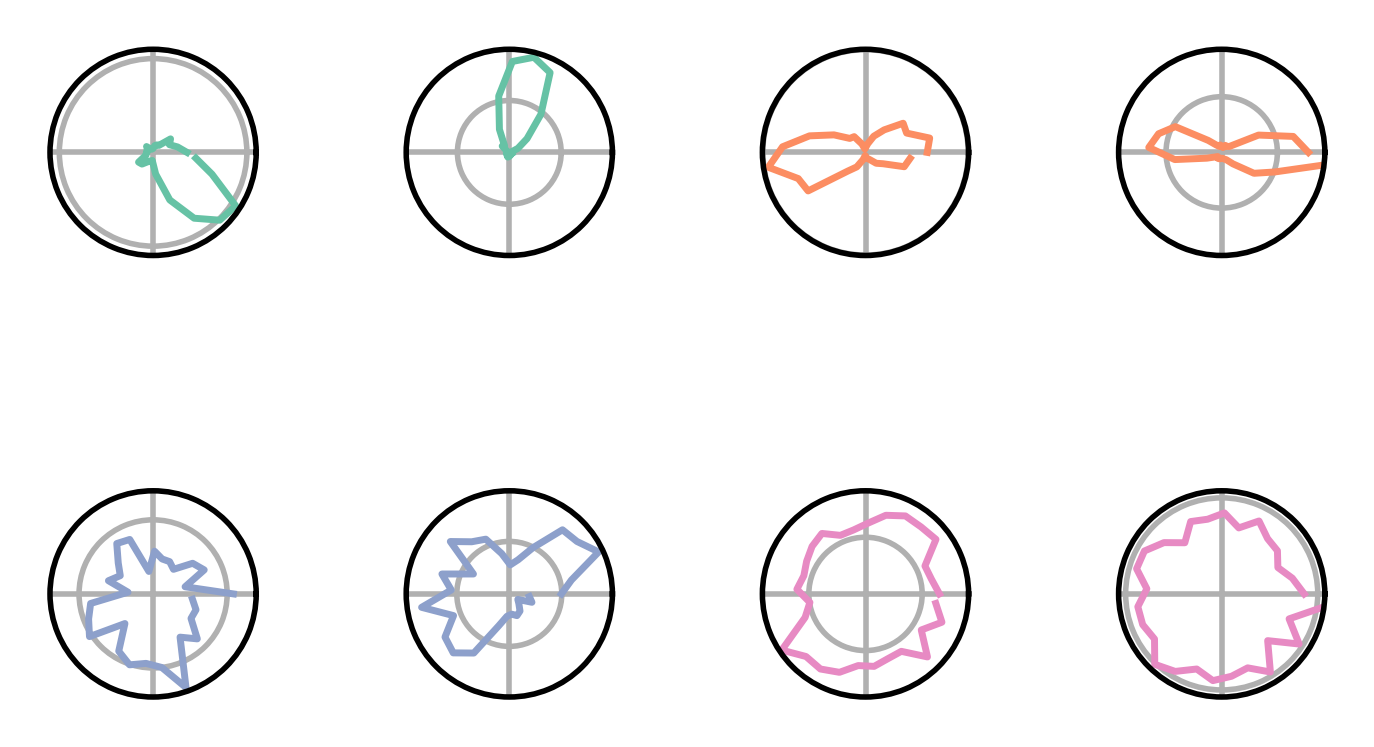

In [21]:
cluster_responses = []
[cluster_responses.append(avg_responses_lowres[:,neuron_clusters[i]]) for i in range(n_clusters)]
#[cluster_responses.append(avg_responses[:,neuron_clusters[i]][:,np.argsort(np.argmax(avg_responses[:,neuron_clusters[i]],0))][:int(stim_res/2)+1]) for i in range(n_clusters)]


#plot some random tunning curves from the two populations
fig = plt.figure(dpi=500,figsize=(8*cm,6*cm))
nplots = 2
for n in range(n_clusters):
    for i in range(nplots):
        ax = fig.add_subplot(nplots,n_clusters,i+1+n*nplots,projection='polar')
        plt.polar(stim_bins_lowres[:-1],cluster_responses[n][:,np.random.randint(len(neuron_clusters[n].T))],color=cust_cmap2.colors[n],linewidth=1)
        plt.xticks([0,np.pi/2,np.pi,(3/2)*np.pi])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
plt.tight_layout()
fig.savefig('/Users/constb/Figures/NeuralHomology/polar_plots.png',transparent=True,dpi=500, bbox_inches='tight')

In [ ]:
metric_used = geodesic_knn(k=4,adaptive=True).fit#pairwise_distances#geodesic#
dmult=0.25
homs = []
clust_cycles = []
clust_crossections = []
for i in range(n_clusters):
    homs.append(Homologizer(cluster_responses[i],metric_used,False,dim_red,[1,None]))
    clust_cycles.append(np.argsort(homs[i][1][1][:,1]-homs[i][1][1][:,0]).astype(int)[-1])
    clust_crossections.append(homs[i][1][1][clust_cycles[i]][0]+ dmult*(homs[i][1][1][clust_cycles[i]][1]-homs[i][1][1][clust_cycles[i]][0]))


In [ ]:
for i in range(n_clusters):
    Homologizer.barcode_plot(homs[i][1],2)
    plt.figure(figsize=(18*cm,18*cm))
    BA.plotCocycle2D(homs[i][0],cluster_responses[i],clust_crossections[i],labels=[],node_cmap='seismic',n_labels=0)
    plt.axis('off')
    #plt.savefig('/Users/constb/Figures/NeuralHomology/circular_graph_half'+str(i)+'.png',transparent=True,dpi=500, bbox_inches='tight')


### Extract edges at critical births

In [ ]:
edge_dists = []
for i in range(n_clusters):
    edge_dist = np.copy(homs[i][0])
    edge_dist[edge_dist>clust_crossections[i]] = 0
    edge_dists.append(edge_dist)

for i in range(n_clusters):
    plt.figure(figsize=(4*cm,4*cm))
    plt.imshow(edge_dists[i], extent=[0,360,360,0],cmap=cust_cmap)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('/Users/constb/Figures/NeuralHomology/dmat'+str(i)+'.png',transparent=True,dpi=500, bbox_inches='tight',figsize=(1*cm,1*cm))


In [ ]:
shifted_distances = []
for i in range(n_clusters):
    shifted_distances.append(shift_triag_diag(homs[i][0]))

plt.figure(dpi=200,figsize=(6,6))
for i in range(n_clusters):
    plt.subplot(n_clusters,2,1)
    norm_x = np.nanmean(homs[i][0]/np.linalg.norm(homs[i][0],2,1),0)
    plt.plot(stim_bins_degrees[:-1],norm_x,color=cust_cmap2.colors[i],linewidth=.8,markersize=3)
    plt.subplot(n_clusters,2,2)
    plt.plot(stim_bins_degrees[:-1],np.nanmean(shifted_distances[i],0),color=cust_cmap2.colors[i],linewidth=.8,markersize=3)
plt.tight_layout()

## Decoding from subpopulations

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

responses.shape

X_train, X_test, y_train, y_test = train_test_split(
     responses.T, indices, test_size=0.2)

DO_reg = LinearRegression().fit(X_train[:,unimodal_neurons],y_train)
O_reg = LinearRegression().fit(X_train[:,bimodal_neurons],y_train)
D_reg = LinearRegression().fit(X_train[:,nonlinear_neurons],y_train)
untuned_reg = LinearRegression().fit(X_train[:,noise_neurons],y_train)

DO_pred = DO_reg.predict(X_test[:,unimodal_neurons])
O_pred = O_reg.predict(X_test[:,bimodal_neurons])
D_pred = D_reg.predict(X_test[:,nonlinear_neurons])
untuned_pred = untuned_reg.predict(X_test[:,noise_neurons])

In [ ]:
print(DO_reg.score(X_test[:,unimodal_neurons],y_test))
print(O_reg.score(X_test[:,bimodal_neurons],y_test))
print(D_reg.score(X_test[:,nonlinear_neurons],y_test))
print(untuned_reg.score(X_test[:,noise_neurons],y_test))

plt.figure(dpi=200)
plt.subplot(2,2,1)
plt.plot(DO_pred,y_test,'.')


plt.subplot(2,2,2)
plt.plot(O_pred,y_test,'.')


plt.subplot(2,2,3)
plt.plot(D_pred,y_test,'.')


plt.subplot(2,2,4)
plt.plot(untuned_pred,y_test,'.')


In [ ]:
from dreimac import CircularCoords, ProjectiveCoords
X_train, X_test, y_train, y_test = train_test_split(
     avg_responses, np.arange(0,len(avg_responses)), test_size=0.2)

#X_mfld = PCA(n_components=2).fit_transform(X_train)

cc = CircularCoords(avg_responses,126)
#pc = ProjectiveCoords(avg_responses,100)

f1 = cc.get_coordinates(perc=1, cocycle_idx=[0])
f2 = cc.get_coordinates(perc=1, cocycle_idx=[1])
#f = phi

plt.scatter(ori_mfld[:, 0], ori_mfld[:, 1], c=f1+f2, cmap='magma_r')
plt.figure()
plt.plot(f1)
plt.plot(f2)